In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.utils import np_utils
import tensorflow

# Data Preperation

In [3]:
x=pd.read_csv("fashion-mnist.csv")
X_=np.array(x)
X=X_[:,1:]
X=X/255
Y=X_[:,0]

print(X.shape,Y.shape)


(10000, 784) (10000,)


In [5]:
X_train=X.reshape(-1,28,28,1)
Y_train=np_utils.to_categorical(Y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


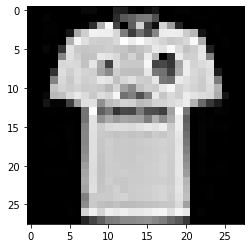

In [13]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')

# CNN model

In [17]:
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [21]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [22]:
hist=model.fit(X_train,Y_train,epochs=20,batch_size=256,shuffle=True,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 34s 4ms/step - loss: 1.4649 - accuracy: 0.4931 - val_loss: 0.9494 - val_accuracy: 0.6745
Epoch 2/20
8000/8000 [==============================] - 33s 4ms/step - loss: 0.7609 - accuracy: 0.7220 - val_loss: 0.6617 - val_accuracy: 0.7770
Epoch 3/20
8000/8000 [==============================] - 36s 4ms/step - loss: 0.6041 - accuracy: 0.7815 - val_loss: 0.6046 - val_accuracy: 0.7985
Epoch 4/20
8000/8000 [==============================] - 35s 4ms/step - loss: 0.5528 - accuracy: 0.7989 - val_loss: 0.5766 - val_accuracy: 0.8000
Epoch 5/20
8000/8000 [==============================] - 31s 4ms/step - loss: 0.4864 - accuracy: 0.8278 - val_loss: 0.4896 - val_accuracy: 0.8345
Epoch 6/20
8000/8000 [==============================] - 36s 4ms/step - loss: 0.4547 - accuracy: 0.8385 - val_loss: 0.4727 - val_accuracy: 0.8340
Epoch 7/20
8000/8000 [==============================] - 35s 4ms/step - loss: 0.437

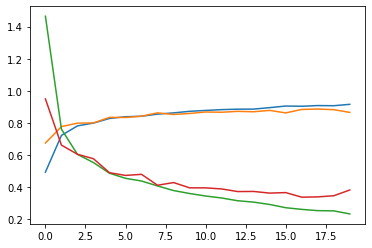

In [29]:
h=hist.history
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.plot(h['loss'])
plt.plot(h['val_loss'])

In [30]:
model.fit_generator?